In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
footnotes = pd.read_csv('/content/drive/MyDrive/Copy of footnotes.csv') # replace with local file paths
stocks = pd.read_csv('/content/drive/MyDrive/Copy of stocks_Jan-Nov2023.csv')
trades = pd.read_csv('/content/drive/MyDrive/Copy of trades.csv')

<ipython-input-2-439fb64a744c>:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  stocks = pd.read_csv('/content/drive/MyDrive/Copy of stocks_Jan-Nov2023.csv')


In [3]:
footnotes.head() # Quick look at the data

,filename,accession_num,footnote,index,field,text
0,1929335_2_0000899243-23-016238.txt,0000899243-23-016238,F1,derivTrans1,exerciseDate,The option will vest and become exercisable at...
1,1124105_4_0001140361-23-050019.txt,0001140361-23-050019,F1,nonDerivTrans1,transactionCoding,Represents an internal transfer by the Reporti...
2,1124105_4_0001140361-23-050019.txt,0001140361-23-050019,F1,nonDerivTrans1,transactionPricePerShare,Represents an internal transfer by the Reporti...
3,1124105_4_0001140361-23-050019.txt,0001140361-23-050019,F2,derivTrans1,conversionOrExercisePrice,Shares of Series X Convertible Preferred Stock...
4,1124105_4_0001140361-23-050019.txt,0001140361-23-050019,F1,derivTrans1,transactionCoding,Represents an internal transfer by the Reporti...


In [4]:
stocks.head()

,date,TICKER,COMNAM,PRC,VOL,RET,SHROUT
0,1/3/2023,JJSF,J & J SNACK FOODS CORP,151.48000,89954.0,0.011823,19229.0
1,1/4/2023,JJSF,J & J SNACK FOODS CORP,151.22000,52980.0,-0.001716,19229.0
2,1/5/2023,JJSF,J & J SNACK FOODS CORP,149.60001,60472.0,-0.010713,19229.0
3,1/6/2023,JJSF,J & J SNACK FOODS CORP,152.64000,57034.0,0.020321,19229.0
4,1/9/2023,JJSF,J & J SNACK FOODS CORP,149.61000,63214.0,-0.019851,19229.0


In [5]:
trades.head()

,accession_num,order,trans_date,trans_type,price,shares,shares_owned,CIK,name,ticker
0,0001140361-23-050019,1,10/27/2023,D,NaN,5371304.0,0.0,1124105,"CATALYST BIOSCIENCES, INC.",CBIO
1,0000885550-23-000118,1,11/14/2023,D,418.04,115.0,6173.0,885550,CREDIT ACCEPTANCE CORP,CACC
2,0000885550-23-000118,2,11/14/2023,D,419.62,100.0,6073.0,885550,CREDIT ACCEPTANCE CORP,CACC
3,0000885550-23-000118,3,11/14/2023,D,420.72,2240.0,3833.0,885550,CREDIT ACCEPTANCE CORP,CACC
4,0000885550-23-000118,4,11/14/2023,D,421.38,459.0,3374.0,885550,CREDIT ACCEPTANCE CORP,CACC


#### Question 1.
Using the trades.csv file, create a new table that shows the net insider trades for each company over the period January 1 – April 30, 2023.
The resulting table should contain:  TICKER and NET_SHARES, defined as:
NET_SHARES  ( shares acquired –  shares disposed)

Can you think of another, better way to measure insider buying and selling activity over this period? If so, describe how you would measure it, and include that variable in the table too.


In [6]:
trades['trans_date'] = pd.to_datetime(trades['trans_date'], errors='coerce')
filtered_trades = trades[(trades['trans_date'] >= '2023-01-01') & (trades['trans_date'] <= '2023-04-30')] # Filter the date

The second variable is called 'total_value'. Total_value measures buying/selling in a 'better' way by accounting for the price of the shares. For simplicity, the most recent share price is used.

In [9]:
# Calculate NET_SHARES and TOTAL_VALUE for each company
net_trades = pd.DataFrame()
for ticker in filtered_trades['ticker'].unique():
    # Filter trades for the current ticker
    ticker_trades = filtered_trades[filtered_trades['ticker'] == ticker]

    # Check if there are any trades for the current ticker
    if not ticker_trades.empty:
        # Calculate net shares (total shares acquired minus total shares disposed)
        net_shares = ticker_trades[ticker_trades['trans_type'] == 'A']['shares'].sum() - ticker_trades[ticker_trades['trans_type'] == 'D']['shares'].sum()

        # Find the most recent price for the current ticker
        most_recent_price = ticker_trades['price'].iloc[-1]

        # Calculate total value using the most recent price
        total_value = most_recent_price * net_shares

        ticker_net_trades = pd.DataFrame({'TICKER': [ticker], 'NET_SHARES': [net_shares], 'TOTAL_VALUE': [total_value]})

    # Concatenate ticker_net_trades for the current ticker with the net_trades DataFrame
        net_trades = pd.concat([net_trades, ticker_net_trades], ignore_index=True)

        # Using the append function caused a bunch of warnings. Replaced with pd.concat.
        #net_trades = net_trades.append({'TICKER': ticker, 'NET_SHARES': net_shares, 'TOTAL_VALUE': total_value}, ignore_index=True)


In [10]:
net_trades.head()

,TICKER,NET_SHARES,TOTAL_VALUE
0,ACN,-25628.0,-7.275917e+06
1,MYFW,7316.0,2.059454e+05
2,DINO,-17991301.0,-9.314097e+08
3,RCL,322082.0,0.000000e+00
4,HIBB,147130.0,8.682141e+06


#### Question 2.
Use the stocks_Jan-Nov2023.csv file to visualize cumulative returns for the company Pfizer (TICKER = PFE) over the period February 1 August 31, 2023.

Specifically, produce a line chart showing the value of an investment in Pfizer at the end of each day. Assume you started with 10,000 dollars worth of stock bought at the February 1 closing price, and that any dividends are reinvested. Give your chart the title “Value of $10,000 worth of PFE stock over time.”

Bonus: Write your program in a way that would make it easy for you to create a similar chart for a different company, time period, or starting dollar amount.


In [11]:
stocks['date'] = pd.to_datetime(stocks['date'], errors='coerce')

<ipython-input-12-5c16f440cb46>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pfe_stocks['RET'] = pd.to_numeric(pfe_stocks['RET'])
<ipython-input-12-5c16f440cb46>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pfe_stocks['cumulative_returns'] = (1 + pfe_stocks['RET']).cumprod()
<ipython-input-12-5c16f440cb46>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

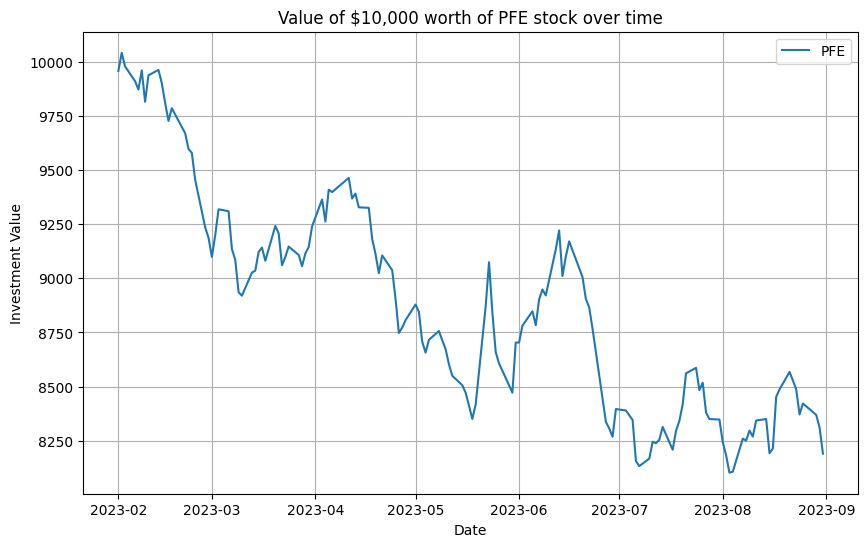

In [12]:
pfe_stocks = stocks[(stocks['TICKER'] == 'PFE') & (stocks['date'] >= '02/01/2023') & (stocks['date'] <= '08/31/2023')]

# Calculate cumulative returns for Pfizer
pfe_stocks['RET'] = pd.to_numeric(pfe_stocks['RET'])
pfe_stocks['cumulative_returns'] = (1 + pfe_stocks['RET']).cumprod()

# Set the initial investment amount
initial_investment = 10000

# Calculate the value of the investment over time
pfe_stocks['investment_value'] = initial_investment * pfe_stocks['cumulative_returns']

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(pfe_stocks['date'], pfe_stocks['investment_value'], label='PFE')
plt.title('Value of $10,000 worth of PFE stock over time')
plt.xlabel('Date')
plt.ylabel('Investment Value')
plt.legend()
plt.grid(True)
plt.show()

Bonus: The generalized function.

In [13]:
def investment_value(data, ticker, start_date, end_date, initial_investment):
    TICK_stocks = data[(data['TICKER'] == ticker) & (data['date'] >= start_date) & (data['date'] <= end_date)]
    TICK_stocks['RET'] = pd.to_numeric(TICK_stocks['RET'])
    TICK_stocks['cumulative_returns'] = (1 + TICK_stocks['RET']).cumprod()
    TICK_stocks['investment_value'] = initial_investment * TICK_stocks['cumulative_returns']

    plt.figure(figsize=(10, 6))
    plt.plot(TICK_stocks['date'], TICK_stocks['investment_value'], label=ticker)
    plt.title(f'Value of ${initial_investment} worth of {ticker} stock over time')
    plt.xlabel('Date')
    plt.ylabel('Investment Value')
    plt.legend()
    plt.grid(True)
    plt.show()

<ipython-input-13-e676e6346b44>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TICK_stocks['RET'] = pd.to_numeric(TICK_stocks['RET'])
<ipython-input-13-e676e6346b44>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TICK_stocks['cumulative_returns'] = (1 + TICK_stocks['RET']).cumprod()
<ipython-input-13-e676e6346b44>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

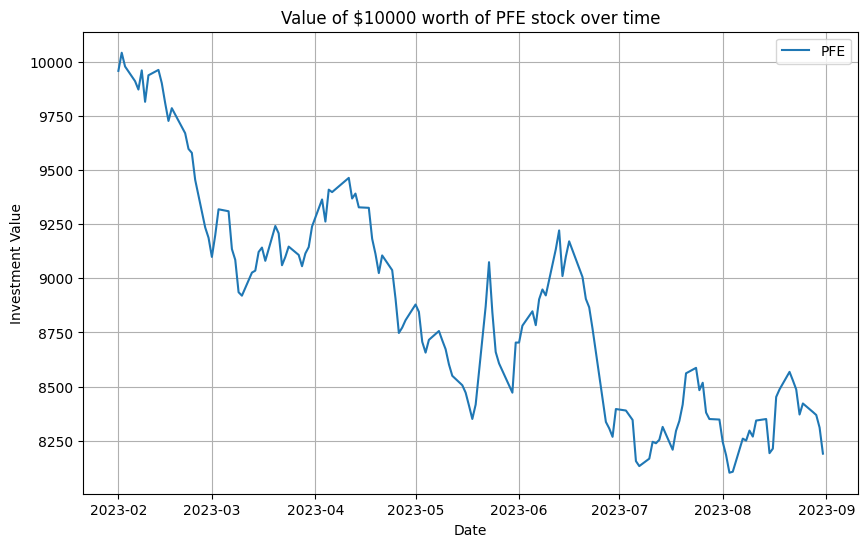

In [14]:
data = stocks # Test of consistency
ticker = 'PFE'
start_date = '02/01/2023'
end_date = '08/31/2023'
initial_investment = 10000
investment_value(data, ticker, start_date, end_date, initial_investment)

#### Question 3.
Using the stocks_Jan-Nov2023.csv file, calculate the cumulative returns for each company over the period May 1 – November 30, 2023. Again, assume any dividends paid are reinvested.
Describe the steps you took to test whether these results are accurate.


In [ ]:
start_date = '05/01/2023'
end_date = '11/30/2023'
filtered_stocks = stocks[(stocks['date'] >= start_date) & (stocks['date'] <= end_date)]
filtered_stocks['RET'] = pd.to_numeric(filtered_stocks['RET'], errors='coerce').fillna(0)

# Calculate cumulative returns for each company
cumulative_returns_list = []

for ticker in filtered_stocks['TICKER'].unique():
    ticker_data = filtered_stocks[filtered_stocks['TICKER'] == ticker]

    # Check if ticker_data is empty
    if not ticker_data.empty:
      # I tried getting rid of the warnings here. No success yet.
        ticker_data['cumulative_returns'] = (1 + ticker_data['RET']).cumprod()
        total_returns = ticker_data['cumulative_returns'].iloc[-1] - 1
        cumulative_returns_list.append({'TICKER': ticker, 'Cumulative_Returns': total_returns})

# Concatenate the results into a DataFrame
cumulative_returns = pd.concat([pd.DataFrame(item, index=[0]) for item in cumulative_returns_list], ignore_index=True)

In [16]:
cumulative_returns.head()

,TICKER,Cumulative_Returns
0,JJSF,0.083532
1,ELA,-0.305861
2,PLXS,0.164865
3,RMCF,-0.238808
4,FKWL,-0.275691


Let's check the accuracy of these cumulative returns by using a visual comparison with the general function from question 2.

<ipython-input-13-e676e6346b44>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TICK_stocks['RET'] = pd.to_numeric(TICK_stocks['RET'])
<ipython-input-13-e676e6346b44>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TICK_stocks['cumulative_returns'] = (1 + TICK_stocks['RET']).cumprod()
<ipython-input-13-e676e6346b44>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

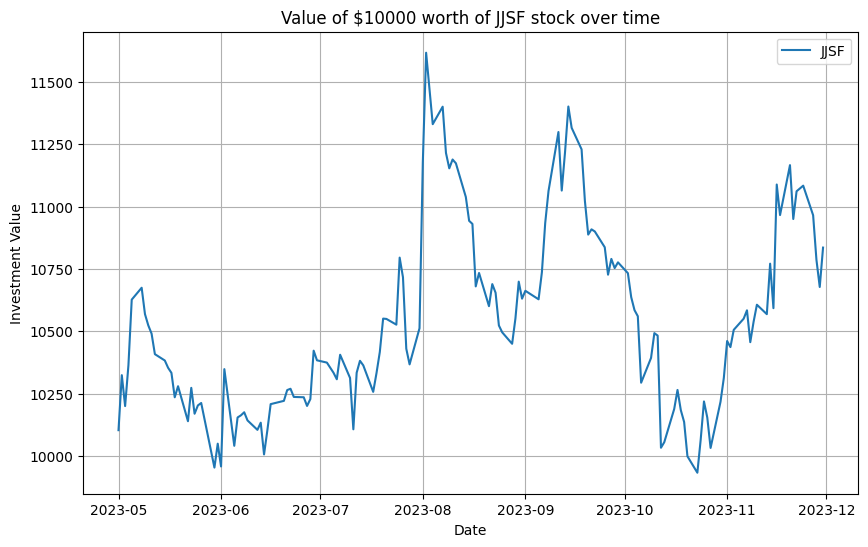

In [17]:
data = stocks # Construct chart for 'JJSF'
ticker = 'JJSF'
start_date = '05/01/2023'
end_date = '11/30/2023'
initial_investment = 10000
investment_value(data, ticker, start_date, end_date, initial_investment)

The graph shows that the investment value of 'JJSF' in the time span is ~10800-10850 with an initial investment of 10000. 10000* (1+0.083532) = 10835.32.


#### Question 4.
A 10b5-1 plan allows insiders to trade company stock according to a predetermined schedule, which is a way for the executive to show that they were not trading based on insider knowledge. Therefore, some argue that 10b5-1 transactions do not predict future returns.

Using the footnotes.csv file, create a dummy variable for each transaction found in trades.csv that equals 1 if and only if the transaction was pursuant to a 10(b)5-1 plan.

How many 10(b)5-1 transactions did you find during January 1 - April 30, 2023? Please describe any steps you took to check your work for accuracy.


In [18]:
merged_df = pd.merge(trades, footnotes, on='accession_num', how='inner')

In [19]:
merged_df['10b5-1_transaction'] = 0  # Initialize all values to 0
merged_df['text'] = merged_df['text'].fillna('')
merged_df.loc[merged_df['text'].str.contains('Rule 10b5-1'), '10b5-1_transaction'] = 1  # Set to 1 if footnote contains 'Rule 10b5-1'

# Count the number of 10(b)5-1 transactions during January 1 - April 30
num_10b5_1_transactions = merged_df[(merged_df['trans_date'] >= '01/01/2023') & (merged_df['trans_date'] <= '04/30/2023')]['10b5-1_transaction'].sum()

print("Number of 10(b)5-1 transactions during January 1 - April 30, 2023:", num_10b5_1_transactions)

Number of 10(b)5-1 transactions during January 1 - April 30, 2023: 269695


Now testing by filtering footnotes first before merging.

In [20]:
footnotes['text'] = footnotes['text'].fillna('')
footnotes_10b5_1 = footnotes[footnotes['text'].str.contains('10(b)5-1')] # This time with the parenthesis

<ipython-input-20-bb65725a7b82>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  footnotes_10b5_1 = footnotes[footnotes['text'].str.contains('10(b)5-1')] # This time with the parenthesis


In [21]:
merged_df = pd.merge(trades, footnotes_10b5_1, on='accession_num', how='inner')

In [22]:
merged_df.loc[merged_df['text'].str.contains('Rule 10b5-1'), '10b5-1_transaction'] = 1 # Reuse the prior code for simplicity
num_10b5_1_transactions = merged_df[(merged_df['trans_date'] >= '01/01/2023') & (merged_df['trans_date'] <= '04/30/2023')]['10b5-1_transaction'].sum()

print("Number of 10(b)5-1 transactions during January 1 - April 30, 2023:", num_10b5_1_transactions)

Number of 10(b)5-1 transactions during January 1 - April 30, 2023: 269695.0


In [23]:
footnotes_10b5_1.describe() # Additional information

,filename,accession_num,footnote,index,field,text
count,84194,84194,84194,84194,84194,84194
unique,32388,15843,25,51,14,4884
top,1069183_1_0001415889-23-005711.txt,0001209191-23-042972,F1,nonDerivTrans1,transactionCoding,This transaction was effected pursuant to a Ru...
freq,38,189,68510,25787,66293,3496


In [24]:
print(footnotes_10b5_1.iloc[100]['text'])

This transaction was effected pursuant to a Rule 10b5-1 trading plan adopted by the Reporting Person.


In [25]:
merged_df.describe()

,order,price,shares,shares_owned,CIK,10b5-1_transaction
count,1.117355e+06,981646.000000,9.927840e+05,1.117351e+06,1.117355e+06,947911.0
mean,5.054817e+00,208.440217,3.029761e+04,3.727365e+06,1.362084e+06,1.0
std,4.815256e+00,1009.968594,1.237750e+06,1.166897e+08,3.973875e+05,0.0
min,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.800000e+03,1.0
25%,2.000000e+00,20.523200,4.000000e+02,1.500000e+04,1.087294e+06,1.0
50%,3.000000e+00,112.580000,1.820000e+03,1.088120e+05,1.477333e+06,1.0
75%,7.000000e+00,218.569775,8.000000e+03,5.040670e+05,1.650372e+06,1.0
max,3.000000e+01,188139.000000,3.432671e+08,8.985000e+09,1.990550e+06,1.0
